# LSTM FROM SCRATCH

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Classes and functions

In [2]:
class LSTM():
    def __init__(self, n_neurons, n_features=1):
        """
        """
        
        self.n_neurons = n_neurons
        self.n_features = n_features

        # Forget gate
        self.Uf = 0.1 * np.random.randn(n_neurons, n_features)
        self.bf = 0.1 * np.random.randn(n_neurons, n_features)
        self.Wf = 0.1 * np.random.randn(n_neurons, n_neurons)

        # Input gate
        self.Ui = 0.1 * np.random.randn(n_neurons, n_features)
        self.bi = 0.1 * np.random.randn(n_neurons, n_features)
        self.Wi = 0.1 * np.random.randn(n_neurons, n_neurons)

        # Output gate
        self.Uo = 0.1 * np.random.randn(n_neurons, n_features)
        self.bo = 0.1 * np.random.randn(n_neurons, n_features)
        self.Wo = 0.1 * np.random.randn(n_neurons, n_neurons)

        # C-tilde(t)
        self.Ug = 0.1 * np.random.randn(n_neurons, n_features)
        self.bg = 0.1 * np.random.randn(n_neurons, n_features)
        self.Wg = 0.1 * np.random.randn(n_neurons, n_neurons)

    def forward(self, X_t):
        """
        """
        
        T = max(X_t.shape)

        self.T = T
        self.X_t = X_t

        n_neurons = self.n_neurons
        n_features = self.n_features

        self.H = [np.zeros((n_neurons, n_features)) for t in range(T+1)]
        self.C = [np.zeros((n_neurons, n_features)) for t in range(T+1)]
        self.C_tilde = [np.zeros((n_neurons, n_features)) for t in range(T)]

        self.F = [np.zeros((n_neurons, n_features)) for t in range(T)]
        self.I = [np.zeros((n_neurons, n_features)) for t in range(T)]
        self.O = [np.zeros((n_neurons, n_features)) for t in range(T)]

        # Forget gate
        self.dUf = 0.1 * np.random.randn(n_neurons, n_features)
        self.dbf = 0.1 * np.random.randn(n_neurons, n_features)
        self.dWf = 0.1 * np.random.randn(n_neurons, n_neurons)
        
        # Input gate
        self.dUi = 0.1 * np.random.randn(n_neurons, n_features)
        self.dbi = 0.1 * np.random.randn(n_neurons, n_features)
        self.dWi = 0.1 * np.random.randn(n_neurons, n_neurons)
        
        # Output gate
        self.dUo = 0.1 * np.random.randn(n_neurons, n_features)
        self.dbo = 0.1 * np.random.randn(n_neurons, n_features)
        self.dWo = 0.1 * np.random.randn(n_neurons, n_neurons)
        
        # C_tilde(t)
        self.dUg = 0.1 * np.random.randn(n_neurons, n_features)
        self.dbg = 0.1 * np.random.randn(n_neurons, n_features)
        self.dWg = 0.1 * np.random.randn(n_neurons, n_neurons)

        Sigmf = [Sigmoid() for i in range(T)]
        Sigmi = [Sigmoid() for i in range(T)]
        Sigmo = [Sigmoid() for i in range(T)]

        Tanh1 = [Tanh() for i in range(T)]
        Tanh2 = [Tanh() for i in range(T)]

        ht = self.H[0]
        ct = self.C[0]

        # Call the LSTM cell
        [H, C, Sigmf, Sigmi, Sigmo, Tanh1, Tanh2, F, O, I, C_tilde] = self.LSTMCell(
            X_t, ht, ct, Sigmf, Sigmi, Sigmo, Tanh1, Tanh2, self.H, self.C, self.F, self.O, self.I, self.C_tilde)

        self.F = F
        self.I = I
        self.O = O
        self.C_tilde = C_tilde

        self.H = H
        self.C = C

        self.Sigmf = Sigmf
        self.Sigmi = Sigmi
        self.Sigmo = Sigmo
        self.Tanh1 = Tanh1
        self.Tanh2 = Tanh2

    def LSTMCell(self, X_t, ht, ct, Sigmf, Sigmi, Sigmo, Tanh1, Tanh2, H, C, F, O, I, C_tilde):
        """
        """

        for t, xt in enumerate(X_t):
            xt = xt.reshape(1,1)

            # Forget gate
            outf = np.dot(self.Uf, xt) + np.dot(self.Wf, ht) + self.bf
            Sigmf[t].forward(outf)
            ft = Sigmf[t].output

            # Input gate
            outi = np.dot(self.Ui, xt) + np.dot(self.Wi, ht) + self.bi
            Sigmi[t].forward(outi)
            it = Sigmi[t].output

            # Output gate
            outo = np.dot(self.Uo, xt) + np.dot(self.Wo, ht) + self.bo
            Sigmo[t].forward(outo)
            ot = Sigmo[t].output

            # C_tilde(t)
            outct_tilde = np.dot(self.Ug, xt) + np.dot(self.Wg, ht) + self.bg
            Tanh1[t].forward(outct_tilde)
            ct_tilde = Tanh1[t].output

            ct = np.multiply(ft, ct) + np.multiply(it, ct_tilde)

            Tanh2[t].forward(ct)
            ht = np.multiply(Tanh2[t].output, ot)

            H[t+1] = ht
            C[t+1] = ct
            C_tilde[t] = ct_tilde

            F[t] = ft
            O[t] = ot
            I[t] = it

        return (H, C, Sigmf, Sigmi, Sigmo, Tanh1, Tanh2, F, O, I, C_tilde)

    def backward(self, dvalues):
        """
        """

        T = self.T
        H = self.H
        C = self.C

        O = self.O
        I = self.I
        C_tilde = self.C_tilde

        X_t = self.X_t

        Sigmf = self.Sigmf
        Sigmi = self.Sigmi
        Sigmo = self.Sigmo
        Tanh1 = self.Tanh1
        Tanh2 = self.Tanh2

        dht = dvalues[-1, :].reshape(self.n_neurons, self.n_features) # n_features replace with 1 ???
        
        # Back Propagation Through Time (BPTT)
        for t in reversed(range(T)):
            xt = X_t[t].reshape(1,1)

            Tanh2[t].backward(dht)
            dtanh2 = Tanh2[t].dinputs

            dhtdtanh = np.multiply(O[t], dtanh2)

            dctdft = np.multiply(dhtdtanh, C[t-1])
            dctdit = np.multiply(dhtdtanh, C_tilde[t])
            dctdct_tilde = np.multiply(dhtdtanh, I[t])

            Tanh1[t].backward(dctdct_tilde)
            dtanh1 = Tanh1[t].dinputs

            Sigmf[t].backward(dctdft)
            dsigmf = Sigmf[t].dinputs

            Sigmi[t].backward(dctdit)
            dsigmi = Sigmi[t].dinputs

            Sigmo[t].backward(np.multiply(dht, Tanh2[t].output))
            dsigmo = Sigmo[t].dinputs

            dsigmfdUf = np.dot(dsigmf, xt)
            dsigmfdWf = np.dot(dsigmf, H[t-1].T)

            self.dUf += dsigmfdUf
            self.dWf += dsigmfdWf
            self.dbf += dsigmf

            dsigmidUi = np.dot(dsigmi, xt)
            dsigmidWi = np.dot(dsigmi, H[t-1].T)

            self.dUi += dsigmidUi
            self.dWi += dsigmidWi
            self.dbi += dsigmi

            dsigmodUo = np.dot(dsigmo, xt)
            dsigmodWo = np.dot(dsigmo, H[t-1].T)

            self.dUo += dsigmodUo
            self.dWo += dsigmodWo
            self.dbo += dsigmo

            dtanh1dUg = np.dot(dtanh1, xt)
            dtanh1dWg = np.dot(dtanh1, H[t-1].T)

            self.dUg += dtanh1dUg
            self.dWg += dtanh1dWg
            self.dbg += dtanh1

            dht = np.dot(self.Wf, dsigmf) + np.dot(self.Wi, dsigmi) + np.dot(self.Wo, dsigmo) + np.dot(
                self.Wg, dtanh1) + dvalues[t-1, :].reshape(self.n_neurons, self.n_features) # n_features replace with 1 ???

        self.H = H

In [3]:
class Tanh:
    """
    """

    def forward(self, inputs):
        """
        """
        
        self.inputs = inputs
        self.output = np.tanh(inputs)

    def backward(self, dvalues):
        """
        """
        
        deriv = 1 - self.output ** 2
        self.dinputs = np.multiply(deriv, dvalues)

In [4]:
class Sigmoid:
    """
    """

    def forward(self, M):
        """
        """
        
        sigm = np.clip(1 / (1 + np.exp(-M)), 1e-7, 1 - 1e-7)
        self.inputs = sigm # needed for back propagation
        self.output = sigm

    def backward(self, dvalues):
        """
        """
        sigm = self.inputs
        deriv = np.multiply(sigm, (1 - sigm))
        self.dinputs = np.multiply(deriv, dvalues)

In [5]:
class Layer_Dense():
    """
    """

    def __init__(self, n_inputs, n_neurons):
        """
        """
        
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

        L2 = 1e-2
        self.weights_L2 = L2
        self.biases_L2  = L2

    def forward(self, inputs):
        """
        """

        self.output = np.dot(inputs, self.weights) + self.biases
        self.inputs = inputs

    def backward(self, dvalues):
        """
        """

        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

        self.dbiases  = self.dbiases  + 2 * self.biases_L2 * self.biases
        self.dweights = self.dweights + 2 * self.weights_L2 * self.weights

In [6]:
class Optimizer_SGD:
    """
    """

    def __init__(self, learning_rate=1e-5, decay=0, momentum=0):
        """
        """

        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def pre_update_params(self):
        """
        """

        if self.decay:
            self.current_learning_rate = self.learning_rate * (1 / (1 + self.decay * self.iterations))

    def update_params(self, layer):
        """
        """

        if self.momentum:
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases
        
        layer.weights += weight_updates
        layer.biases  += bias_updates

    def post_update_params(self):
        """
        """

        self.iterations += 1

In [7]:
class Optimizer_SGD_LSTM:
    """
    """

    def __init__(self, learning_rate=1e-5, decay=0, momentum=0):
        """
        """

        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def pre_update_params(self):
        """
        """

        if self.decay:
            self.current_learning_rate = self.learning_rate * (1 / (1 + self.decay * self.iterations))

    def update_params(self, layer):
        """
        """

        if self.momentum:
            if not hasattr(layer, 'Uf_momentums'):
                layer.Uf_momentums = np.zeros_like(layer.Uf)
                layer.Ui_momentums = np.zeros_like(layer.Ui)
                layer.Uo_momentums = np.zeros_like(layer.Uo)
                layer.Ug_momentums = np.zeros_like(layer.Ug)

                layer.Wf_momentums = np.zeros_like(layer.Wf)
                layer.Wi_momentums = np.zeros_like(layer.Wi)
                layer.Wo_momentums = np.zeros_like(layer.Wo)
                layer.Wg_momentums = np.zeros_like(layer.Wg)

                layer.bf_momentums = np.zeros_like(layer.bf)
                layer.bi_momentums = np.zeros_like(layer.bi)
                layer.bo_momentums = np.zeros_like(layer.bo)
                layer.bg_momentums = np.zeros_like(layer.bg)

            Uf_updates = self.momentum * layer.Uf_momentums - self.current_learning_rate * layer.dUf
            layer.Uf_momentums = Uf_updates
    
            Ui_updates = self.momentum * layer.Ui_momentums - self.current_learning_rate * layer.dUi
            layer.Ui_momentums = Ui_updates
    
            Uo_updates = self.momentum * layer.Uo_momentums - self.current_learning_rate * layer.dUo
            layer.Uo_momentums = Uo_updates
    
            Ug_updates = self.momentum * layer.Ug_momentums - self.current_learning_rate * layer.dUg
            layer.Ug_momentums = Ug_updates
    
            Wf_updates = self.momentum * layer.Wf_momentums - self.current_learning_rate * layer.dWf
            layer.Wf_momentums = Wf_updates
    
            Wi_updates = self.momentum * layer.Wi_momentums - self.current_learning_rate * layer.dWi
            layer.Wi_momentums = Wi_updates
    
            Wo_updates = self.momentum * layer.Wo_momentums - self.current_learning_rate * layer.dWo
            layer.Wo_momentums = Wo_updates
    
            Wg_updates = self.momentum * layer.Wg_momentums - self.current_learning_rate * layer.dWg
            layer.Wg_momentums = Wg_updates
    
            bf_updates = self.momentum * layer.bf_momentums - self.current_learning_rate * layer.dbf
            layer.bf_momentums = bf_updates
    
            bi_updates = self.momentum * layer.bi_momentums - self.current_learning_rate * layer.dbi
            layer.bi_momentums = bi_updates
    
            bo_updates = self.momentum * layer.bo_momentums - self.current_learning_rate * layer.dbo
            layer.bo_momentums = bo_updates
    
            bg_updates = self.momentum * layer.bg_momentums - self.current_learning_rate * layer.dbg
            layer.bg_momentums = bg_updates

        else:
            Uf_updates = -self.current_learning_rate * layer.dUf
            Ui_updates = -self.current_learning_rate * layer.dUi
            Uo_updates = -self.current_learning_rate * layer.dUo
            Ug_updates = -self.current_learning_rate * layer.dUg

            Wf_updates = -self.current_learning_rate * layer.dWf
            Wi_updates = -self.current_learning_rate * layer.dWi
            Wo_updates = -self.current_learning_rate * layer.dWo
            Wg_updates = -self.current_learning_rate * layer.dWg

            bf_updates = -self.current_learning_rate * layer.dbf
            bi_updates = -self.current_learning_rate * layer.dbi
            bo_updates = -self.current_learning_rate * layer.dbo
            bg_updates = -self.current_learning_rate * layer.dbg

        layer.Uf += Uf_updates
        layer.Ui += Ui_updates
        layer.Uo += Uo_updates
        layer.Ug += Ug_updates

        layer.Wf += Wf_updates
        layer.Wi += Wi_updates
        layer.Wo += Wo_updates
        layer.Wg += Wg_updates

        layer.bf += bf_updates
        layer.bi += bi_updates
        layer.bo += bo_updates
        layer.bg += bg_updates

    def post_update_params(self):
        """
        """

        self.iterations += 1

In [8]:
def RunLSTM(X_t, Y_t, n_epochs = 500, n_neurons = 500, learning_rate = 1e-5, 
            decay = 0, momentum = 0.95, plot_each = 50, dt = 0):

    #initializing LSTM
    lstm          = LSTM(n_neurons)
    T             = max(X_t.shape)
    dense1        = Layer_Dense(n_neurons, T)
    dense2        = Layer_Dense(T, 1)
    optimizerLSTM = Optimizer_SGD_LSTM(learning_rate, decay, momentum)
    optimizer     = Optimizer_SGD(learning_rate, decay, momentum)
    
    #Monitor   = np.zeros((n_epochs,1))
    X_plot    = np.arange(0,T)
    
    if dt != 0:
        X_plots = np.arange(0,T + dt)
        X_plots = X_plots[dt:]
        X_t_dt  = Y_t[:-dt]
        Y_t_dt  = Y_t[dt:]
    else:
        X_plots = X_plot
        X_t_dt  = X_t
        Y_t_dt  = Y_t
    
    print("LSTM is running...")
    
    for n in range(n_epochs):
        
        if dt != 0:
            Idx      = random.sample(range(T-dt), 2)
            leftidx  = min(Idx)
            rightidx = max(Idx)
            
            X_t_cut  = X_t_dt[leftidx:rightidx]
            Y_t_cut  = Y_t_dt[leftidx:rightidx]
        else:
            X_t_cut  = X_t_dt
            Y_t_cut  = Y_t_dt
        
        
        for i in range(5):
        
            lstm.forward(X_t_cut)
            
            H = np.array(lstm.H)
            H = H.reshape((H.shape[0],H.shape[1]))
            
            #states to Y_hat
            dense1.forward(H[1:,:])
            dense2.forward(dense1.output)

            Y_hat = dense2.output
    
            dY = Y_hat - Y_t_cut
            #L  = 0.5*np.dot(dY.T,dY)/T_cut
            
            dense2.backward(dY)
            dense1.backward(dense2.dinputs)
            
            lstm.backward(dense1.dinputs)
            
            optimizer.pre_update_params()
            optimizerLSTM.pre_update_params()
            
            optimizerLSTM.update_params(lstm)
            optimizerLSTM.post_update_params()
            
            optimizer.update_params(dense1)
            optimizer.update_params(dense2)
            optimizer.post_update_params()
        
        if not n % plot_each:
            
            Y_hat_chunk = Y_hat

            lstm.forward(X_t)
            
            H = np.array(lstm.H)
            H = H.reshape((H.shape[0],H.shape[1]))
            
            #states to Y_hat
            dense1.forward(H[1:,:])
            dense2.forward(dense1.output)

            Y_hat = dense2.output
            
            if dt !=0:
                dY    = Y_hat[:-dt] - Y_t[dt:]
            else:
                dY    = Y_hat - Y_t
                
            L = 0.5*np.dot(dY.T,dY)/(T-dt)
            
            #------------------------------------------------------------------
            M = np.max(np.vstack((Y_hat,Y_t)))
            m = np.min(np.vstack((Y_hat,Y_t)))
            plt.plot(X_plot, Y_t)
            plt.plot(X_plots, Y_hat)
            plt.plot(X_plots[leftidx:rightidx], Y_hat_chunk)
            plt.legend(['y', '$\hat{y}$', 'current $\hat{y}$ chunk'])
            plt.title('epoch ' + str(n))
            if dt != 0:
                plt.fill_between([X_plot[-1], X_plots[-1]],\
                              m, M, color = 'k', alpha = 0.1)
            plt.plot([X_plot[-1], X_plot[-1]], [m, M],'k-',linewidth = 3)
            plt.title('epoch ' + str(n))
            plt.show()
            #------------------------------------------------------------------
            
            L = float(L) 

            print(f'current MSSE = {L:.3f}')
        
        #updating learning rate, if decay
        optimizerLSTM.pre_update_params()
        optimizer.pre_update_params()
        
####finally, one last plot of the complete data################################
    lstm.forward(X_t)
    
    H = np.array(lstm.H)
    H = H.reshape((H.shape[0],H.shape[1]))
    
    #states to Y_hat
    dense1.forward(H[1:,:])
    dense2.forward(dense1.output)

    Y_hat = dense2.output
    
    if dt !=0:
        dY    = Y_hat[:-dt] - Y_t[dt:]
    else:
        dY    = Y_hat - Y_t
                
    L  = 0.5*np.dot(dY.T,dY)/(T-dt)
    
    plt.plot(X_plot, Y_t)
    plt.plot(X_plots, Y_hat)
    plt.legend(['y', '$\hat{y}$'])
    plt.title('epoch ' + str(n))
    if dt != 0:
        plt.fill_between([X_plot[-1], X_plots[-1]],\
                      m, M, color = 'k', alpha = 0.1)
    plt.plot([X_plot[-1], X_plot[-1]], [m, M],'k-',linewidth = 3)
    plt.title('epoch ' + str(n))
    plt.show()
    
    
    L = float(L) 

    print(f'Done! MSSE = {L:.3f}')
    
    
    return(lstm, dense1, dense2)

###############################################################################
#
###############################################################################
    
def ApplyLSTM(X_t, lstm, dense1, dense2):
    
    T       = max(X_t.shape)
    #Y_hat   = np.zeros((T, 1))
    H       = lstm.H
    ht      = H[0]
    H       = [np.zeros((lstm.n_neurons,1)) for t in range(T+1)]
    C       = lstm.C
    ct      = C[0]
    C       = [np.zeros((lstm.n_neurons,1)) for t in range(T+1)]
    C_tilde = [np.zeros((lstm.n_neurons,1)) for t in range(T)]
    F       = [np.zeros((lstm.n_neurons,1)) for t in range(T)]
    O       = [np.zeros((lstm.n_neurons,1)) for t in range(T)]
    I       = [np.zeros((lstm.n_neurons,1)) for t in range(T)]
    
    #instances of activation functions as expected by Cell
    Sigmf    = [Sigmoid() for i in range(T)]
    Sigmi    = [Sigmoid() for i in range(T)]
    Sigmo    = [Sigmoid() for i in range(T)]
    
    Tanh1    = [Tanh() for i in range(T)]
    Tanh2    = [Tanh() for i in range(T)]
    
    #we need only the forward part
    [H, _, _, _, _, _, _, _, _, _, _] = lstm.LSTMCell(X_t, ht, ct,\
                                        Sigmf, Sigmi, Sigmo,\
                                        Tanh1, Tanh2,\
                                        H, C, F, O, I, C_tilde)
            
    
    H = np.array(H)
    H = H.reshape((H.shape[0],H.shape[1]))
    
    #states to Y_hat
    dense1.forward(H[0:-1])
    dense2.forward(dense1.output)
    
    Y_hat = dense2.output
    #plt.plot(X_t, Y_hat)
    #plt.legend(['$\hat{y}$'])
    #plt.show()
    
    return(Y_hat)

## Test LSTM

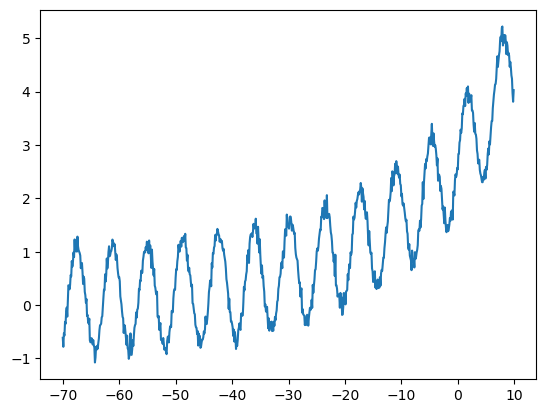

In [9]:
X_t = np.arange(-70, 10, 0.1)
X_t = X_t.reshape(len(X_t),1)
# Y_t = np.sin(X_t) + 0.1 * np.random.randn(len(X_t),1) + np.exp((0.5 * X_t + 20) * 0.05)
Y_t = np.sin(X_t) + 0.1 * np.random.randn(len(X_t),1) + np.exp((X_t + 20) * 0.05)

plt.plot(X_t, Y_t)
plt.show()

### Plots

In [10]:
lstm = LSTM(n_neurons=200)
lstm.forward(X_t)

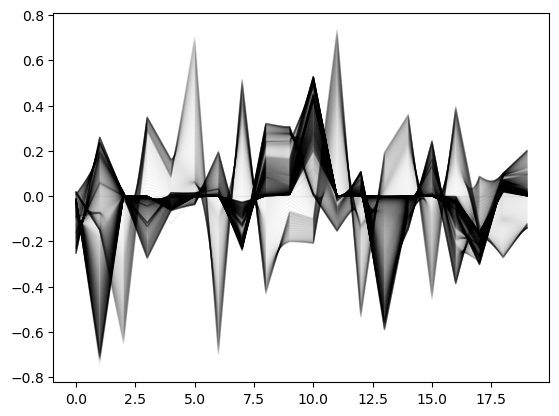

In [11]:
for h in lstm.H:
    plt.plot(np.arange(20), h[0:20], 'k-', linewidth=1, alpha=0.05)

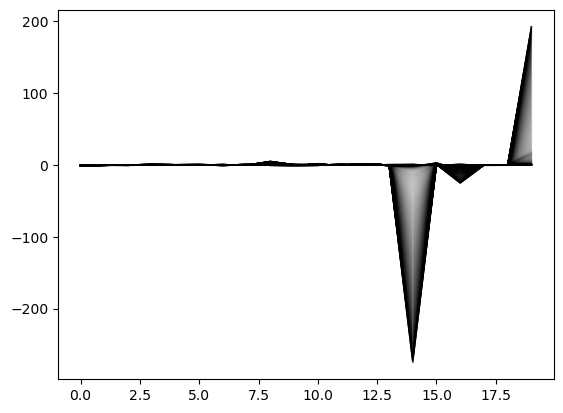

In [12]:
for c in lstm.C:
    plt.plot(np.arange(20), c[0:20], 'k-', linewidth=1, alpha=0.05)

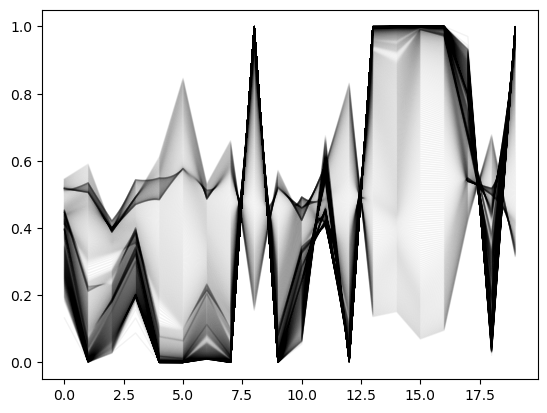

In [13]:
for f in lstm.F:
    plt.plot(np.arange(20), f[0:20], 'k-', linewidth=1, alpha=0.05)

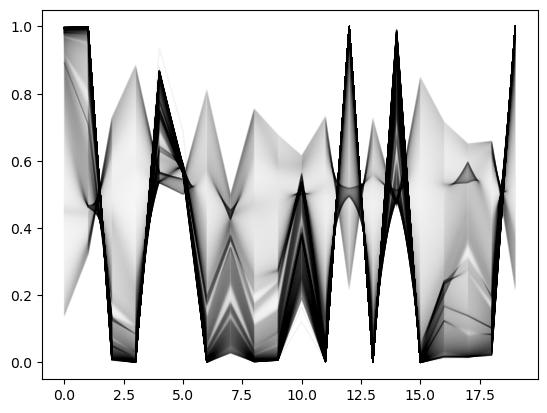

In [14]:
for i in lstm.I:
    plt.plot(np.arange(20), i[0:20], 'k-', linewidth=1, alpha=0.05)

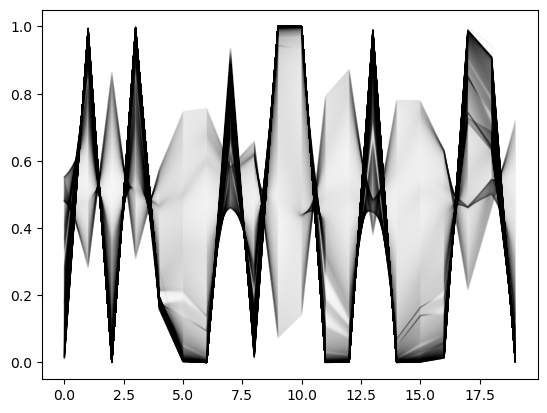

In [15]:
for o in lstm.O:
    plt.plot(np.arange(20), o[0:20], 'k-', linewidth=1, alpha=0.05)

### LSTM without separate optimizer

current MSSE = 3.971
current MSSE = 43.596
current MSSE = 216.837
current MSSE = 140.343
current MSSE = 60.410
current MSSE = 1.846
current MSSE = 0.746
current MSSE = 0.686
current MSSE = 0.647
current MSSE = 0.614
current MSSE = 0.586
current MSSE = 0.561
current MSSE = 0.539
current MSSE = 0.520
current MSSE = 0.503
current MSSE = 0.487
current MSSE = 0.473
current MSSE = 0.461
current MSSE = 0.450
current MSSE = 0.440
current MSSE = 0.430
current MSSE = 0.422
current MSSE = 0.415
current MSSE = 0.408
current MSSE = 0.402
current MSSE = 0.396
current MSSE = 0.391
current MSSE = 0.386
current MSSE = 0.381
current MSSE = 0.377
current MSSE = 0.373
current MSSE = 0.370
current MSSE = 0.366
current MSSE = 0.363
current MSSE = 0.360
current MSSE = 0.358
current MSSE = 0.355
current MSSE = 0.353
current MSSE = 0.350
current MSSE = 0.348
current MSSE = 0.346
current MSSE = 0.344
current MSSE = 0.342
current MSSE = 0.340
current MSSE = 0.338
current MSSE = 0.337
current MSSE = 0.335
current

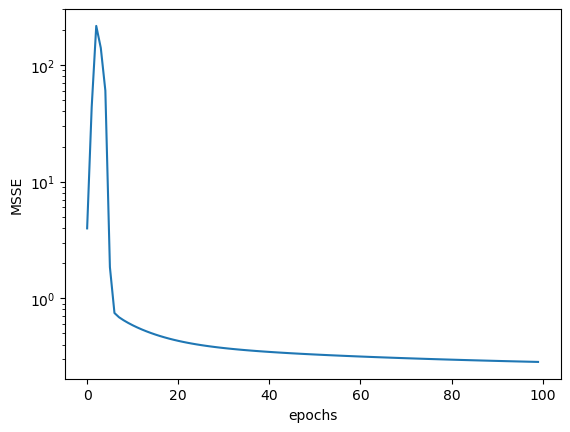

In [16]:
# from LSTM import *
n_neurons = 200

lstm = LSTM(n_neurons=n_neurons)
lstm.forward(X_t)

T = max(X_t.shape)
dense1 = Layer_Dense(n_neurons, T)
dense2 = Layer_Dense(T, 1)

lr = 1e-5
n_epochs = 100
Monitor = np.zeros((100))

for i in range(n_epochs):
    lstm.forward(X_t)

    H = np.array(lstm.H)
    H = H.reshape((H.shape[0], H.shape[1]))

    dense1.forward(H[1:, :])
    dense2.forward(dense1.output)

    Y_hat = dense2.output

    dY = Y_hat - Y_t
    L = float(0.5 * np.dot(dY.T, dY) / T)

    Monitor[i] = L

    dense2.backward(dY)
    dense1.backward(dense2.dinputs)

    lstm.backward(dense1.dinputs)

    # Parameters update
    dense1.weights -= lr * dense1.dweights
    dense2.weights -= lr * dense2.dweights

    dense1.biases -= lr * dense1.dbiases
    dense2.biases -= lr * dense2.dbiases

    lstm.Uf -= lr * lstm.dUf
    lstm.Ui -= lr * lstm.dUi
    lstm.Uo -= lr * lstm.dUo
    lstm.Ug -= lr * lstm.dUg

    lstm.Wf -= lr * lstm.dWf
    lstm.Wi -= lr * lstm.dWi
    lstm.Wo -= lr * lstm.dWo
    lstm.Wg -= lr * lstm.dWg

    lstm.bf -= lr * lstm.dbf
    lstm.bi -= lr * lstm.dbi
    lstm.bo -= lr * lstm.dbo
    lstm.bg -= lr * lstm.dbg

    print(f'current MSSE = {L:.3f}')

plt.plot(range(n_epochs), Monitor)
plt.xlabel('epochs')
plt.ylabel('MSSE')
plt.yscale('log')

### LSTM with separate optimizer

current MSSE = 5.720
current MSSE = 79.905
current MSSE = 277.938
current MSSE = 41.925
current MSSE = 8.721
current MSSE = 0.944
current MSSE = 0.827
current MSSE = 0.761
current MSSE = 0.707
current MSSE = 0.662
current MSSE = 0.623
current MSSE = 0.590
current MSSE = 0.561
current MSSE = 0.536
current MSSE = 0.515
current MSSE = 0.496
current MSSE = 0.480
current MSSE = 0.466
current MSSE = 0.453
current MSSE = 0.442
current MSSE = 0.431
current MSSE = 0.422
current MSSE = 0.414
current MSSE = 0.406
current MSSE = 0.399
current MSSE = 0.393
current MSSE = 0.387
current MSSE = 0.381
current MSSE = 0.376
current MSSE = 0.371
current MSSE = 0.366
current MSSE = 0.362
current MSSE = 0.357
current MSSE = 0.353
current MSSE = 0.350
current MSSE = 0.346
current MSSE = 0.342
current MSSE = 0.339
current MSSE = 0.336
current MSSE = 0.333
current MSSE = 0.330
current MSSE = 0.327
current MSSE = 0.324
current MSSE = 0.322
current MSSE = 0.319
current MSSE = 0.317
current MSSE = 0.315
current M

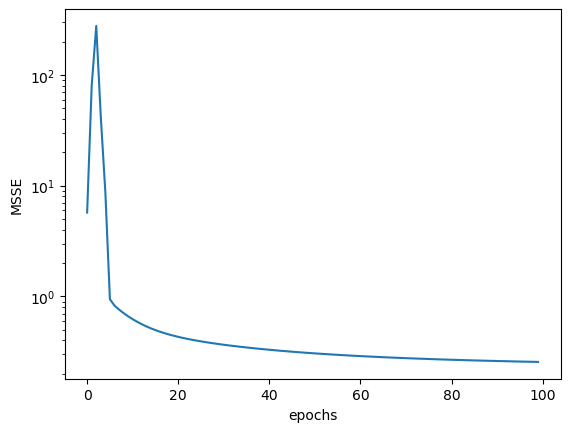

In [17]:
# from LSTM import *
n_neurons = 200

lstm = LSTM(n_neurons=n_neurons)
lstm.forward(X_t)

T = max(X_t.shape)
dense1 = Layer_Dense(n_neurons, T)
dense2 = Layer_Dense(T, 1)

optimizer_lstm = Optimizer_SGD_LSTM()
optimizer = Optimizer_SGD()

n_epochs = 100
Monitor = np.zeros((100))

for i in range(n_epochs):
    lstm.forward(X_t)

    H = np.array(lstm.H)
    H = H.reshape((H.shape[0], H.shape[1]))

    dense1.forward(H[1:, :])
    dense2.forward(dense1.output)

    Y_hat = dense2.output

    dY = Y_hat - Y_t
    L = float(0.5 * np.dot(dY.T, dY) / T)

    Monitor[i] = L

    dense2.backward(dY)
    dense1.backward(dense2.dinputs)

    lstm.backward(dense1.dinputs)

    optimizer_lstm.pre_update_params()
    optimizer.pre_update_params()

    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

    optimizer_lstm.update_params(lstm)

    optimizer_lstm.post_update_params()
    optimizer.post_update_params()

    print(f'current MSSE = {L:.3f}')

plt.plot(range(n_epochs), Monitor)
plt.xlabel('epochs')
plt.ylabel('MSSE')
plt.yscale('log')

## Run LSTM

LSTM is running...


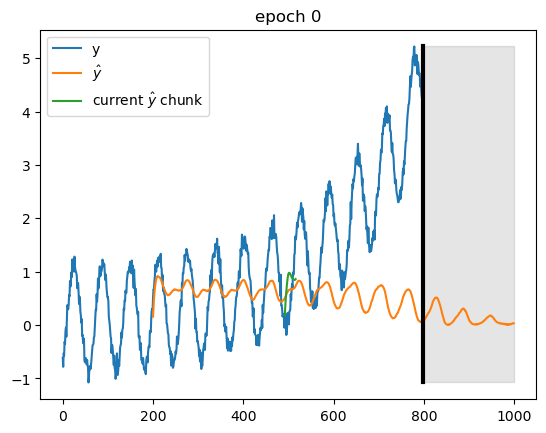

current MSSE = 1.391


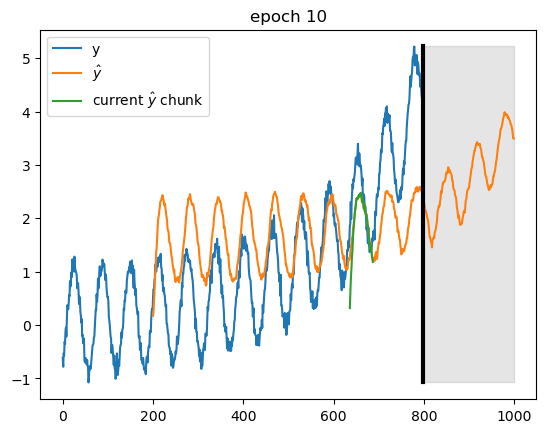

current MSSE = 0.659


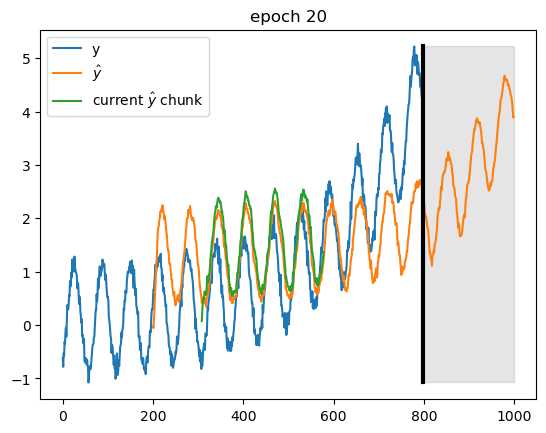

current MSSE = 0.536


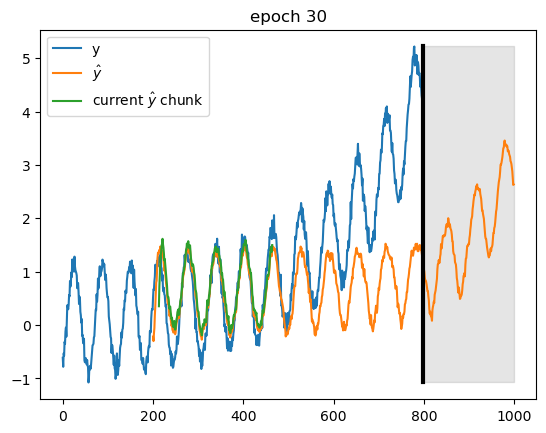

current MSSE = 0.872


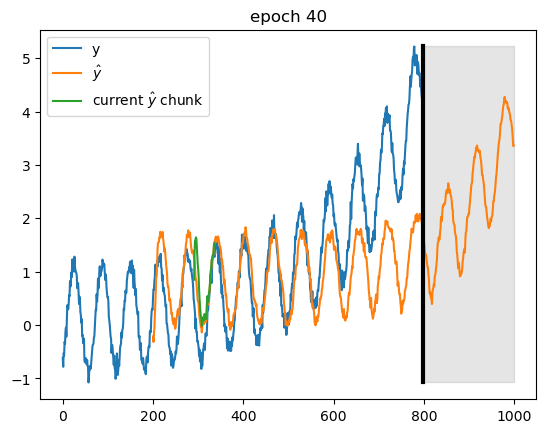

current MSSE = 0.644


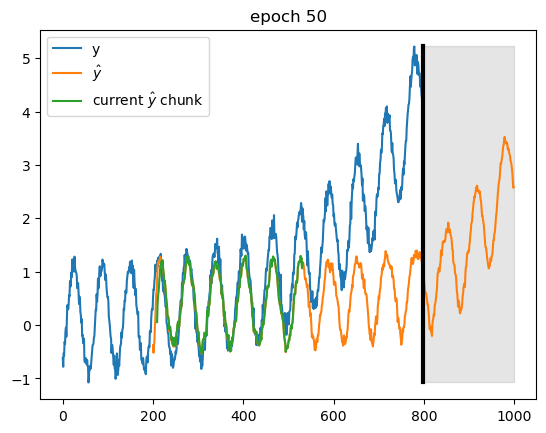

current MSSE = 1.033


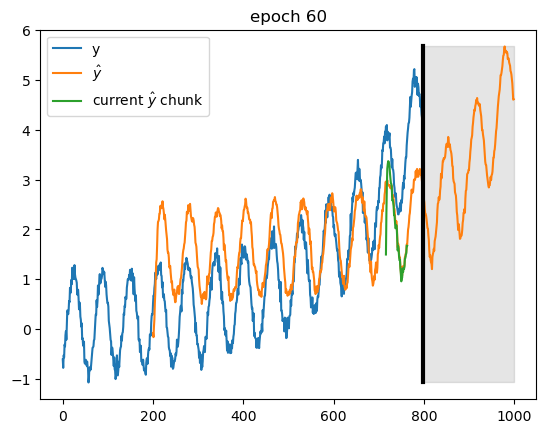

current MSSE = 0.517


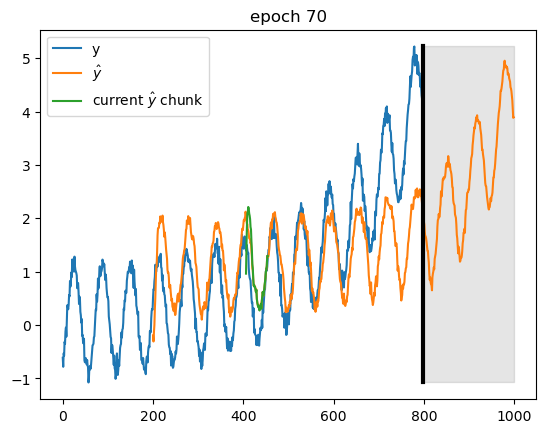

current MSSE = 0.506


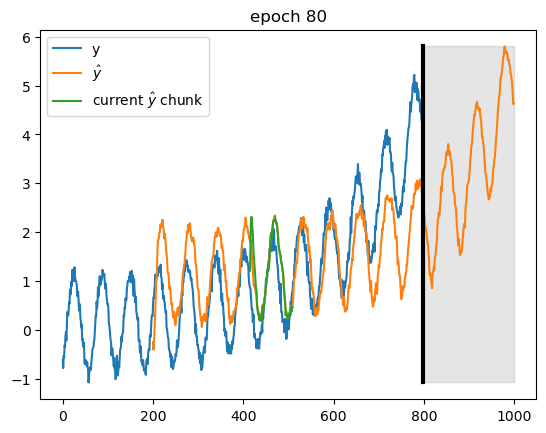

current MSSE = 0.447


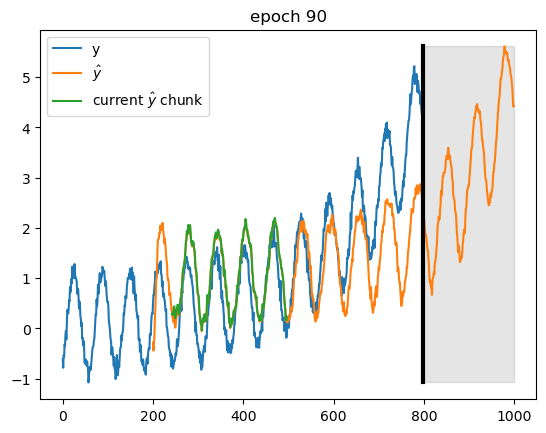

current MSSE = 0.465


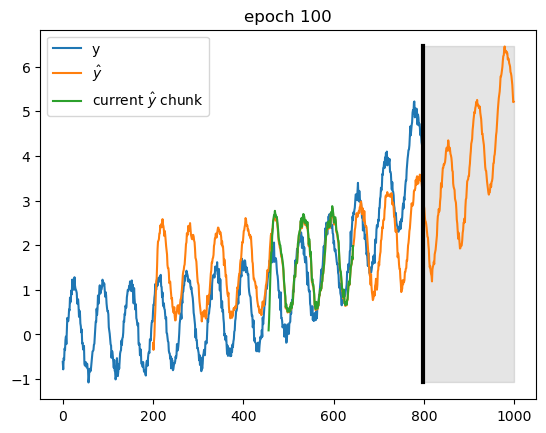

current MSSE = 0.463


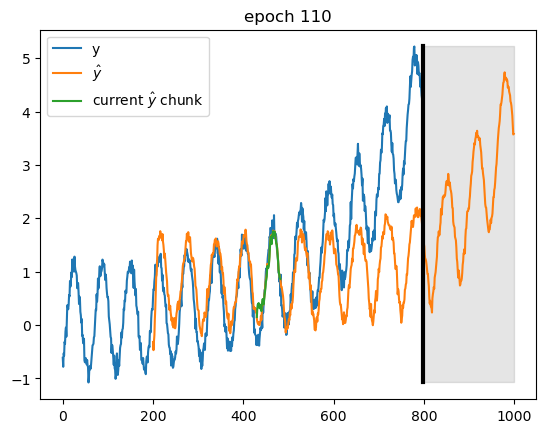

current MSSE = 0.611


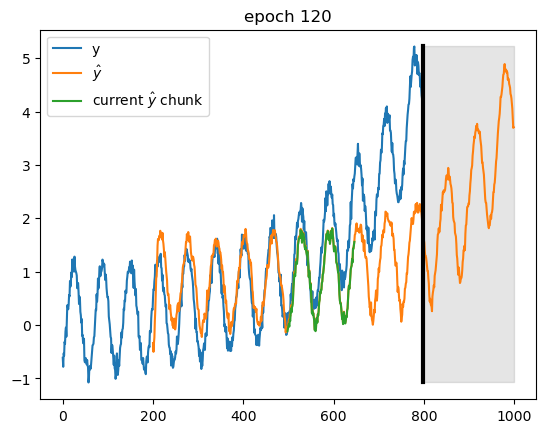

current MSSE = 0.590


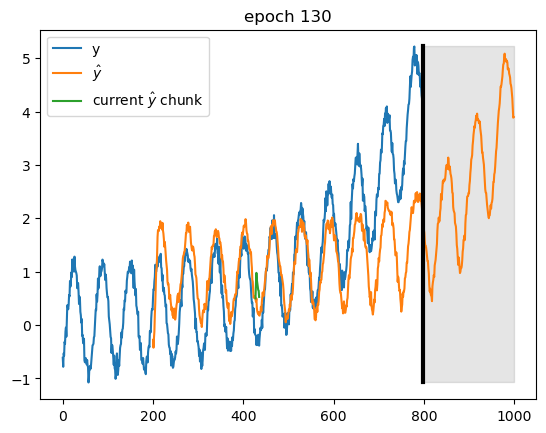

current MSSE = 0.516


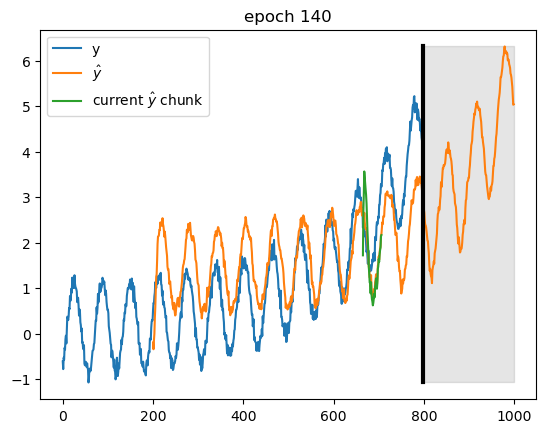

current MSSE = 0.454


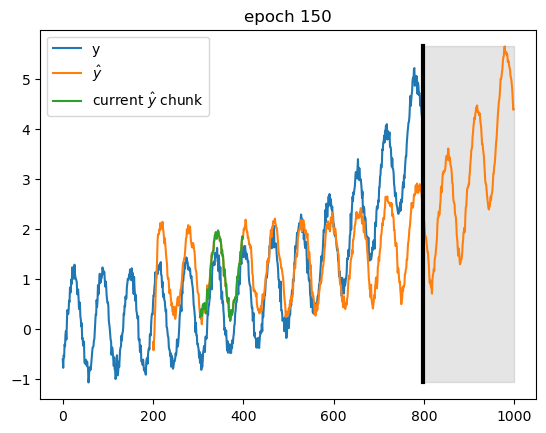

current MSSE = 0.441


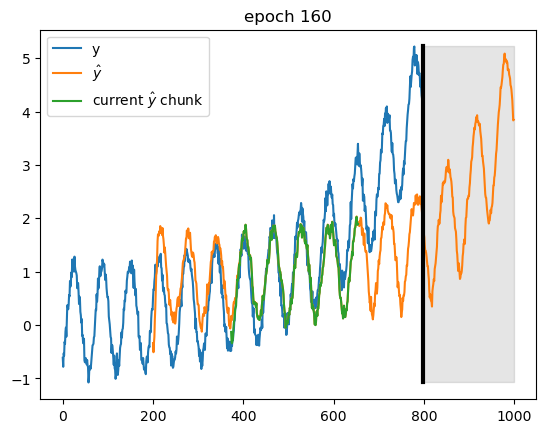

current MSSE = 0.531


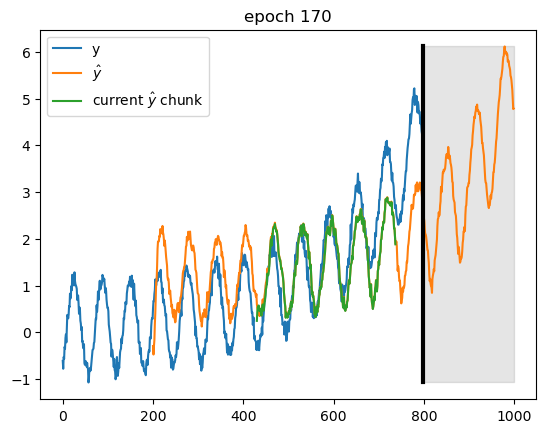

current MSSE = 0.412


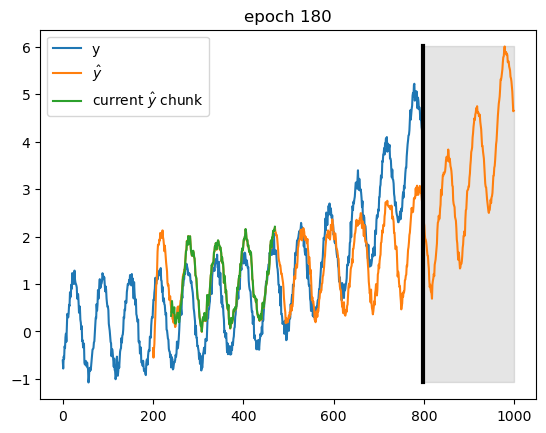

current MSSE = 0.413


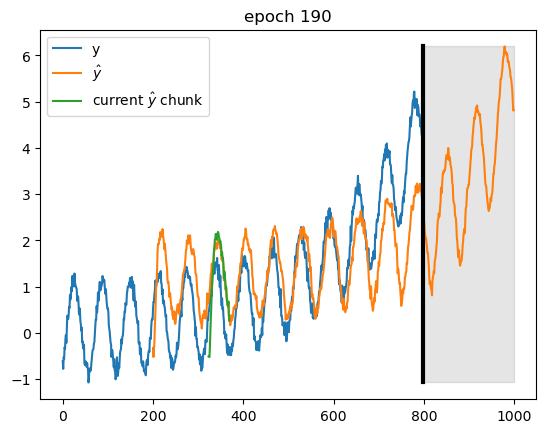

current MSSE = 0.400


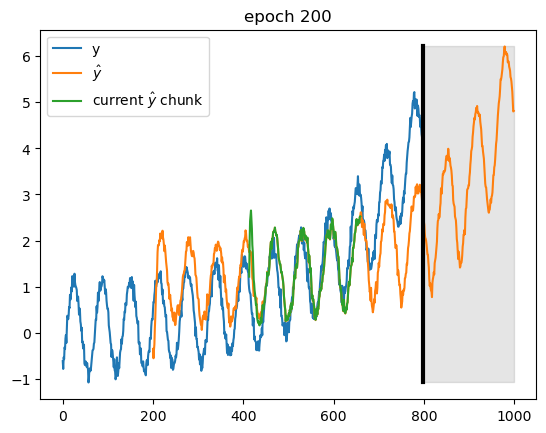

current MSSE = 0.396


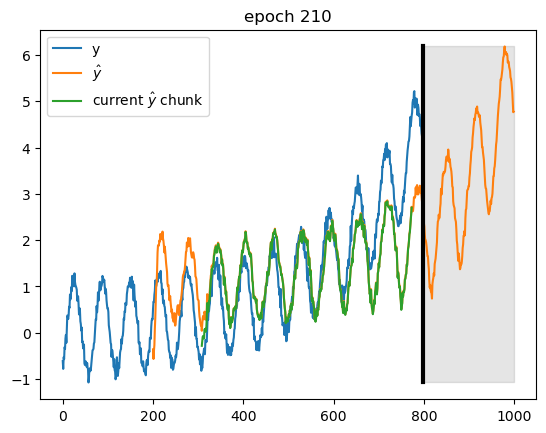

current MSSE = 0.396


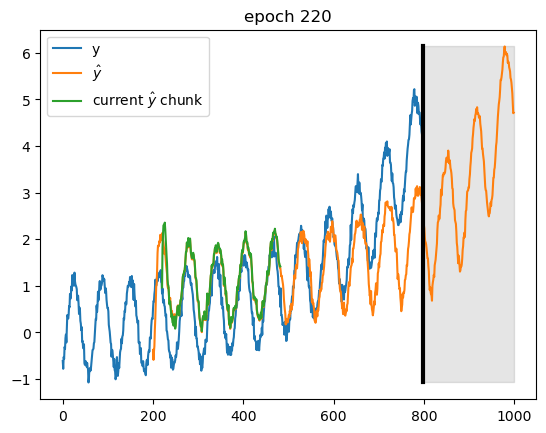

current MSSE = 0.397


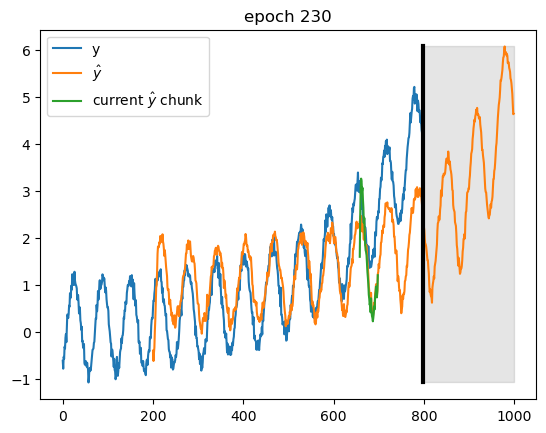

current MSSE = 0.401


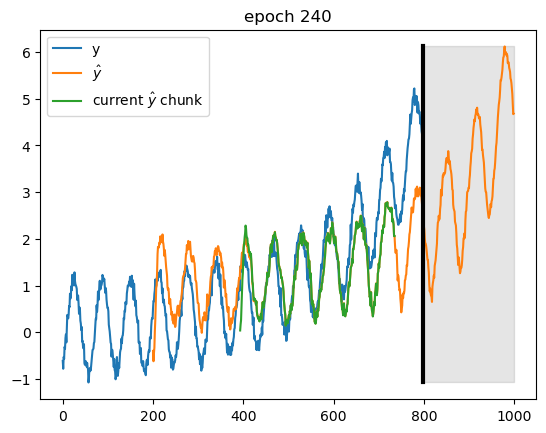

current MSSE = 0.396


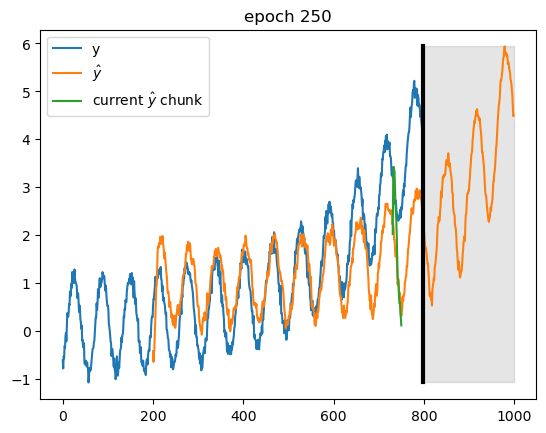

current MSSE = 0.416


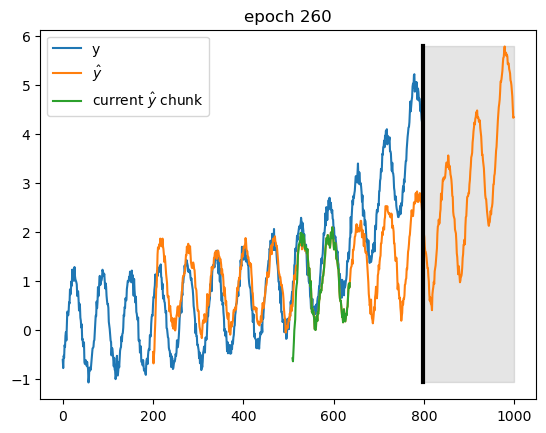

current MSSE = 0.448


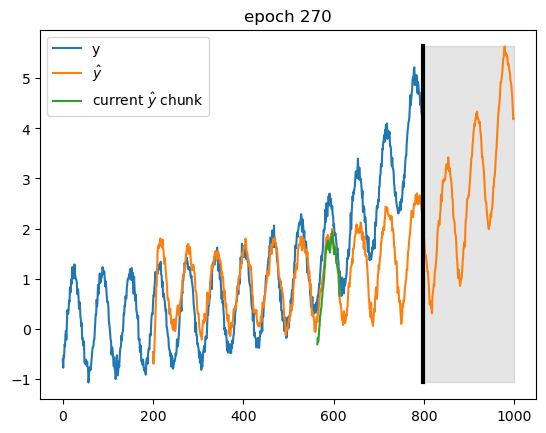

current MSSE = 0.479


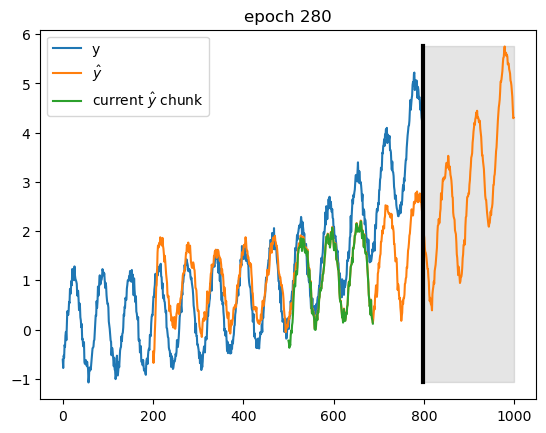

current MSSE = 0.449


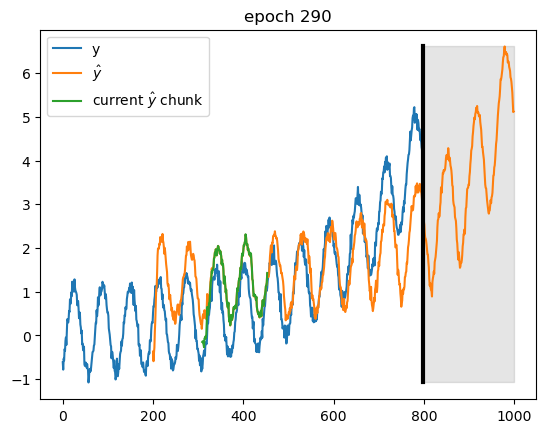

current MSSE = 0.376


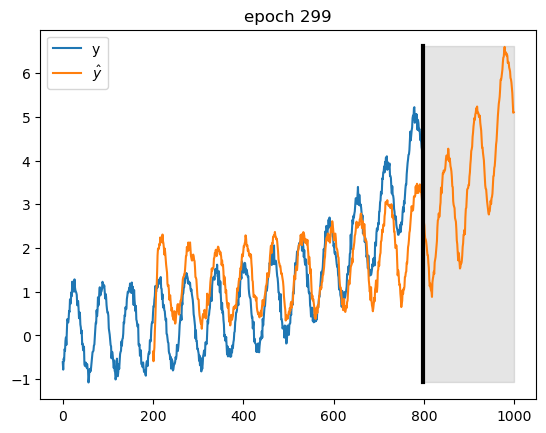

Done! MSSE = 0.375


In [18]:
dt = 200
[lstm, dense1, dense2] = RunLSTM(Y_t, Y_t, n_neurons=300, n_epochs=300, plot_each=10, 
                                 dt=dt, momentum=0.8, decay=0.01, learning_rate=1e-5)

In [19]:
Y_hat = ApplyLSTM(Y_t, lstm, dense1, dense2)

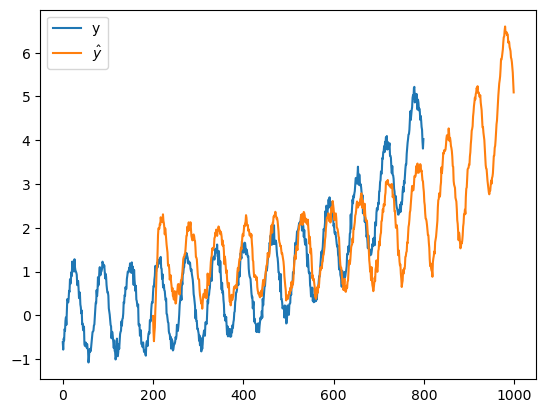

In [20]:
X_plot = np.arange(0, len(Y_t))
X_plot_hat = np.arange(0, len(Y_hat)) + dt

plt.plot(X_plot, Y_t)
plt.plot(X_plot_hat, Y_hat)
plt.legend(['y', '$\hat{y}$'])
plt.show()